## The classification of iris flowers

In this project I will use [**iris**](https://archive.ics.uci.edu/ml/datasets/iris) dataset to visualize and analyze the data. I will also do the classification of the iris flowers by using machine learning concepts.

Firstly, I will load all necessary libraries I will use in this project. 

In [93]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
#jeśli chcemy żeby sns działało to zawsze trzeba też wpisać matplotlib!!!
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_palette('Set2')

import warnings
warnings.filterwarnings("ignore")

Then, I will load dataset and display its first rows and columns. Also, I'm going to change column names and drop 'id' column because it's not needed.

In [94]:
iris = pd.read_csv('iris.csv')
iris.columns = ['id', 'sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris.drop('id', axis=1, inplace=True) 
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


This step is necessary to check if there is any inconsistency in the dataset. If there are null values, we have to clean the data. 

In [95]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


As we see there are no null values in the dataset, so the data can be processed.

In [96]:
iris.shape

(150, 5)

As we can see from the table and information above, after dropping not necessary column, iris dataset contains of 5 columns and 150 rows.

Now I will see statistical description of the dataset.

In [97]:
iris.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Table above shows the basic information like mean, min, max or median values about the dataset. As we can see, for instance, _petal-length_ has min = 1 and max = 6.9. Its median is 4.35 while the mean is 3.76.

Now, I will group the dataset by the class name and I will display the number of items in each class.

In [98]:
pd.DataFrame(iris.groupby('class').size()).head()

,0
class,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


We can see that there are 3 different classes with 50 items each.

* ### **Data visualization**

Now is time to proceed with the visual analysis of the dataset. Firstly, I will plot separate plots for sepal and petal features with the relationship between length and width. It will be helpful for further classification (clustering classes).

#### Sepal features 

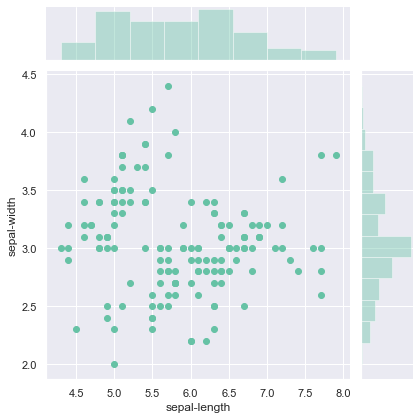

In [99]:
sns.jointplot(x='sepal-length', y='sepal-width', data=iris)

As we can see, the plot above shows the bivariate scatterplots and univariate histograms in the same figure. 

Now I will color the scatterplot by class.

Text(0.5, 1, 'Sepal length vs width')

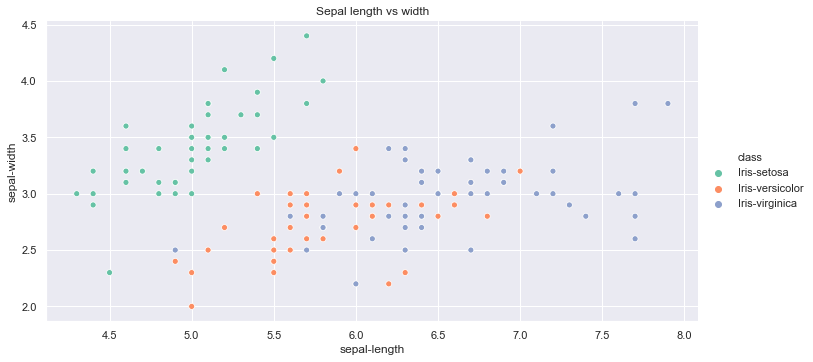

In [100]:
sns.relplot(x='sepal-length', y='sepal-width', hue='class', data=iris, height=5, aspect=10/5)
plt.title('Sepal length vs width')

#### Petal features

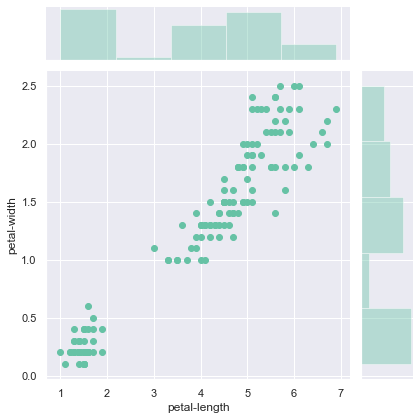

In [101]:
sns.jointplot(x='petal-length', y='petal-width', data=iris)

As we can see, the plot above shows the bivariate scatterplots and univariate histograms in the same figure.


Now I will color the scatterplot by class.

Text(0.5, 1, 'Petal length vs width')

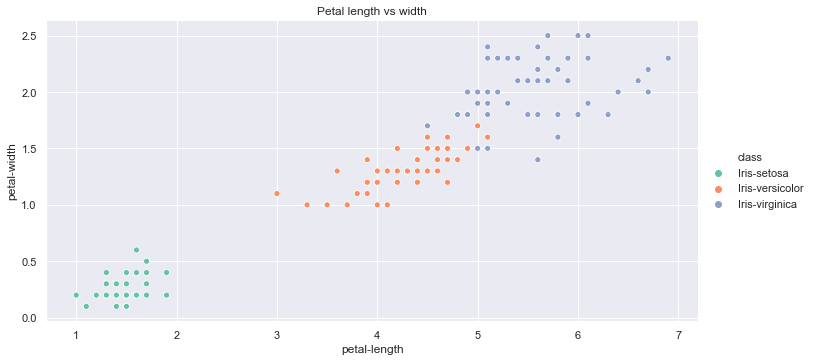

In [102]:
sns.relplot(x='petal-length', y='petal-width', hue='class', data=iris, height=5, aspect=10/5)
plt.title('Petal length vs width')

As we can see, the petal features are easier to cluster comparing to the sepal features. It means that the petal features can help to create better and more accurate predictions over the sepal features. I will check it later.

#### Sepal and petal features

Now I will plot the distribution plot of sepal and petal length and width. 

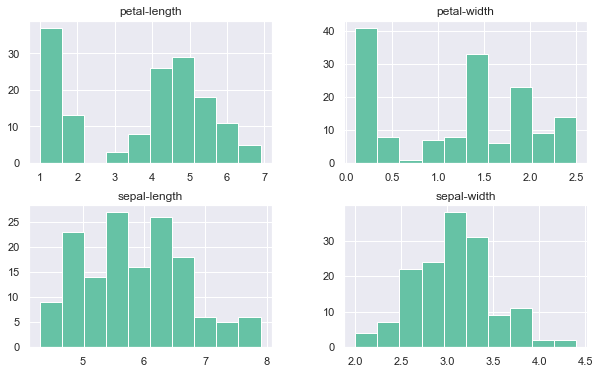

In [103]:
iris.hist(figsize=(10, 6))
plt.show()

From the plot we can see that sepal length and width have, more or less, Gaussian distribution. 

Next, I will do boxplots to check for outliers.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000156454D1588>,
      dtype=object)

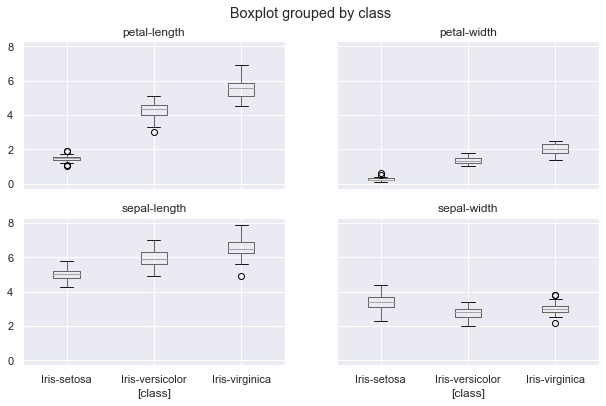

In [104]:
iris.boxplot(by='class', figsize=(10, 6))

As we can see from the plot above, in petal length and width, iris setosa has outliers. Also iris versicolor has outliers in petal length. However, in sepal length and width, the only one that has outliers is iris virginica.

Now we will see how the length and width vary according to the different class.


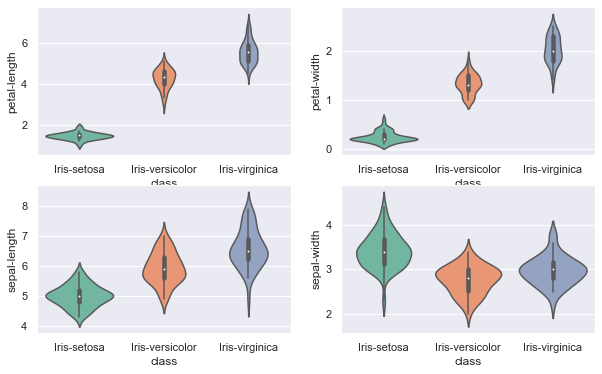

In [105]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.violinplot(x='class', y='petal-length', data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='class', y='petal-width', data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='class', y='sepal-length', data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='class', y='sepal-width', data=iris)

The violinplot shows the density of the length and width in the classes. The thinner part shows that there is less density whereas the fatter part shows higher density.


The final step is to show both sepal and petal features on one plot. I will do it by using the pairplot, which shows the bivariate relation between each pair of features.

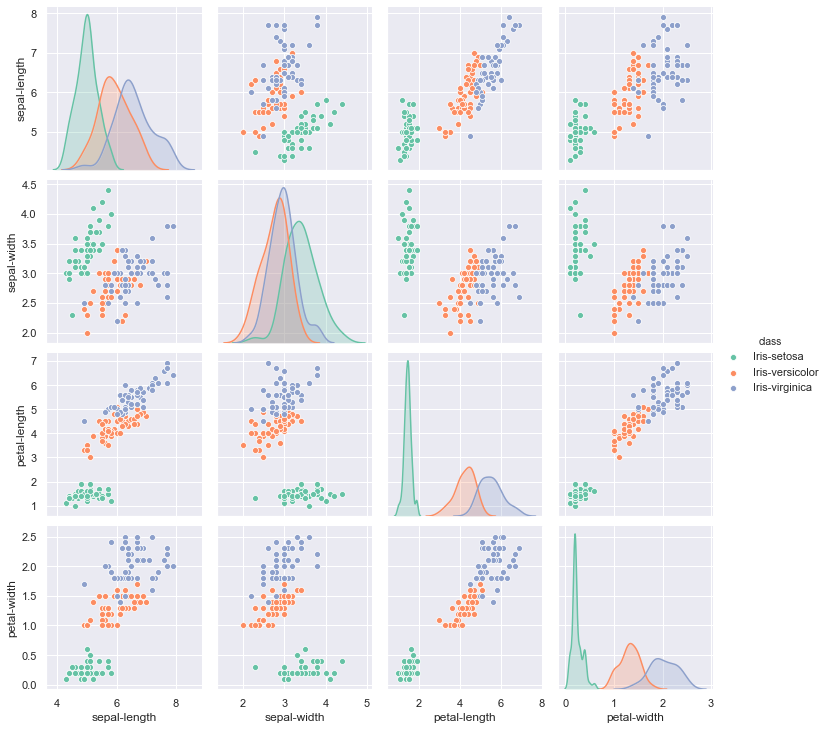

In [106]:
sns.pairplot(iris, hue='class', size=2.5)
plt.show()

As we can see from above, iris setosa is always separated from other classes. It means that the relationship between this class and other classes is different. On the other hand, the relationship between iris versicolor and iris virginica is very visible since they overlap.

The diagonal grouping of some pairs of attributes suggests a high correlation and a predictable relationship. There is a big correlation between iris versicolor and iris virginica.

* ### **Classification problem**

I will create the model that predicts whether the class of iris is setosa, versicolor or virginica. 

In this dataset, our features (attribures) are petal and sepal length and width. Our target variable will be 3 flower classes. 

    In the machine learning context target variable 
    is the variable that is or should be the output.

In this classification problem I will use following algorithms:
* Logistic regression
* Decision tree
* Stochastic Gradient Descent
* K-Nearest Neighbors
* Support Vector Machines
* Naive Bayes Classification
* Random forest

To do so, I will first load necessary libraries. Libraries according to each algorithm will be loaded step by step. 

In [107]:
from sklearn import datasets #to load iris already in int
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.metrics import accuracy_score #for checking the model accuracy
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

To do the calculations, I am going to represent the features and labels as _int_ instead of _string_. 

Since the iris dataset is already represented as _int_ in build in function of scikit learn library, I will load it. I will also assign the features and target variable to separate variables x and y, where:
- x - features (sepal or petal), 
- y - classes (setosa, versicolor ot virginica).

In [108]:
iris = datasets.load_iris()
x = iris.data
y = iris.target
print('The unique classes are: ' + str(np.unique(y)) + '.')

The unique classes are: [0 1 2].


As we can see, our unique values are:
- 0 - iris setosa,
- 1 - iris versicolor,
- 2 - iris virginica.

Since the process involves both training and testing, I will create training and testing datasets, where:
- x_train - training features,
- x_test - testing features,
- y_train - training class,
- y_test - testing class. 


In [109]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 
#test_size - ratio między training a testing (0.2 = 20% ze 150 to testing, reszta to training)

print('There are {} samples in the training set and {} samples in the testing set.'.format
      (x_train.shape[0], x_test.shape[0]))

There are 120 samples in the training set and 30 samples in the testing set.


As we can see, our training set contains of 120 samples while the testing set contains of 30 samples.

Moreover, we have to scale our data, because it matters when it comes to KNN and SGD alghoritms.

In [110]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test=sc.transform(x_test)

Now I will proceed with each algorithm. I will check on accuracy scores for both training and testing sets and also on confusion matrix. Since the dataset is small, I will not check on time taken to train the data. 

#### Logistic regression

In [111]:
from sklearn.linear_model import LogisticRegression

Checking on model's accuracy:

In [112]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train) #we train the algorithm with the training data and the training output
prediction = model_lr.predict(x_test) #now we pass the testing data to the trained algorithm
print('The accuracy of the logistic regression is: %0.2f' 
      % accuracy_score(prediction, y_test), 'on testing set.')
print('The accuracy of the logistic regression is:', model_lr.score(x_train, y_train), 
      'on training set.\n')

print(classification_report(prediction, y_test))

The accuracy of the logistic regression is: 0.97 on testing set.
The accuracy of the logistic regression is: 0.975 on training set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      1.00      0.94         8
           2       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



As we can see, the accuracy of the logistic regression is **97%** on test set and **98%** on training set.

Checking on confusion matrix:

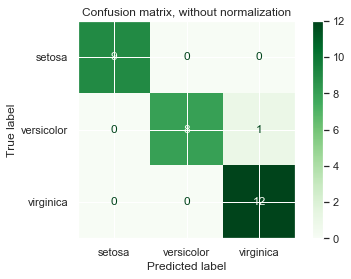

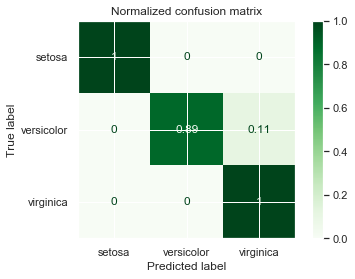

In [113]:
class_names = iris.target_names
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model_lr, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)
plt.show()

#### Stochastic Gradient Descent

In [139]:
from sklearn.linear_model import SGDClassifier

Checking on model's accuracy:

In [142]:
model_sgc = SGDClassifier(loss='modified_huber', shuffle=True, random_state=42)
model_sgc.fit(x_train, y_train)
prediction = model_sgc.predict(x_test)
print('The accuracy of the stochastic gradient descent is: %0.2f' 
      % accuracy_score(prediction, y_test), 'on testing set.')
print('The accuracy of the stochastic gradient descent is:', model_sgc.score(x_train, y_train), 
      'on training set.\n') 

print(classification_report(prediction, y_test))

The accuracy of the stochastic gradient descent is: 0.97 on testing set.
The accuracy of the stochastic gradient descent is: 0.9666666666666667 on training set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      1.00      0.94         8
           2       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



As we can see, the accuracy of the stochastic gradient descent is **97%** on test set and **97%** on training set.

Checking on confusion matrix:

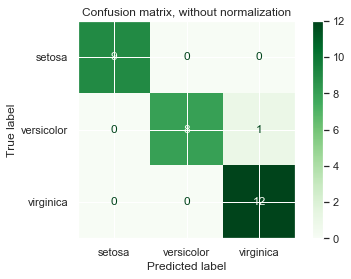

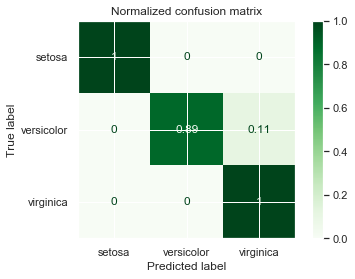

In [116]:
class_names = iris.target_names
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model_sgc, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)
plt.show()

#### Decision tree

In [143]:
from sklearn.tree import DecisionTreeClassifier

Checking on model's accuracy:

In [144]:
model_dt = DecisionTreeClassifier(max_depth=10, max_features=None, min_samples_leaf=15)
model_dt.fit(x_train, y_train)
prediction = model_dt.predict(x_test)
print('The accuracy of the decision tree is: %0.2f' 
      % accuracy_score(prediction, y_test), 'on testing set.')
print('The accuracy of the decision tree is:', model_dt.score(x_train, y_train), 
      'on training set.\n') 

print(classification_report(prediction, y_test))

The accuracy of the decision tree is: 0.90 on testing set.
The accuracy of the decision tree is: 0.9666666666666667 on training set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      0.80      0.84        10
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



As we can see, the accuracy of the decision tree is **90%** on test set and **97%** on training set.

Checking on confusion matrix:

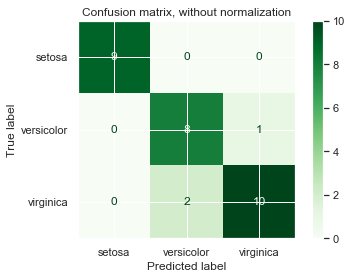

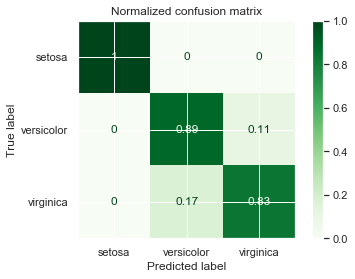

In [119]:
class_names = iris.target_names
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model_dt, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)
plt.show()

#### K-Nearest Neighbors

In [120]:
from sklearn.neighbors import KNeighborsClassifier

Firstly, let's check the accuracy for different k values.

Text(0.5, 1.0, 'Accuracy scores of KKN model for different k values')

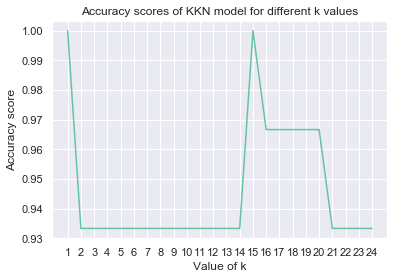

In [121]:
a_index = list(range(1,25))
a = pd.Series()
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

for k in list(range(1,25)):
    model_knn = KNeighborsClassifier(n_neighbors=k) 
    model_knn.fit(x_train, y_train)
    prediction = model_knn.predict(x_test)
    a = a.append(pd.Series(accuracy_score(prediction, y_test)))
    
plt.plot(a_index, a)
plt.xticks(x)
plt.xlabel('Value of k')
plt.ylabel('Accuracy score')
plt.title('Accuracy scores of KKN model for different k values')

The graph above shows the accuracy for the KNN models using different values of k. 

As we can see, the accuracy = 1 is for values 1 and 15. Other values have accuraccy either 0.967 or 0.934.


In this case, we will choose k = 1 for KKN model. We already know, that the accuracy is 100%.

In [148]:
model_knn = KNeighborsClassifier(n_neighbors=1)
model_knn.fit(x_train, y_train)
prediction = model_knn.predict(x_test)
print('The accuracy of the k-nearest neighbors is: %0.2f' 
      % accuracy_score(prediction, y_test), 'on testing set.')
print('The accuracy of the k-nearest neighbors is:', model_knn.score(x_train, y_train), 
      'on training set.\n') 

print(classification_report(prediction, y_test))

The accuracy of the k-nearest neighbors is: 1.00 on testing set.
The accuracy of the k-nearest neighbors is: 1.0 on training set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



As we can see, the accuracy of the k-nearest neighbors for k = 1 is **100%** on test set and **100%** on training set.

Checking on confusion matrix:

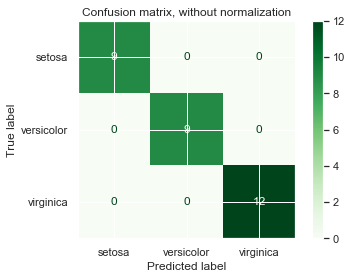

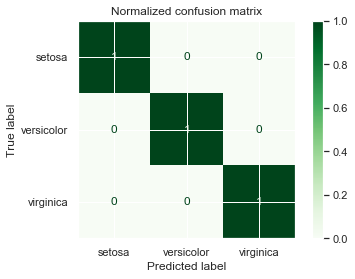

In [149]:
class_names = iris.target_names
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model_knn, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)
plt.show()

#### Support Vector Machines

In [150]:
from sklearn.svm import SVC 

Checking on model's accuracy:

In [152]:
model_svm = SVC(kernel='linear')
model_svm.fit(x_train, y_train)
prediction = model_svm.predict(x_test)
print('The accuracy of the support vector machines is: %0.2f' 
      % accuracy_score(prediction, y_test), 'on testing set.')
print('The accuracy of the support vector machines is:', model_svm.score(x_train, y_train), 
      'on training set.\n') 

print(classification_report(prediction, y_test))

The accuracy of the support vector machines is: 1.00 on testing set.
The accuracy of the support vector machines is: 0.9833333333333333 on training set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



As we can see, the accuracy of the support vector machines is **100%** on test set and **98%** on training set.

Checking on confusion matrix:

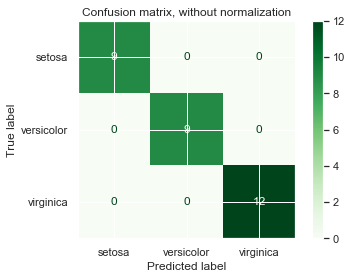

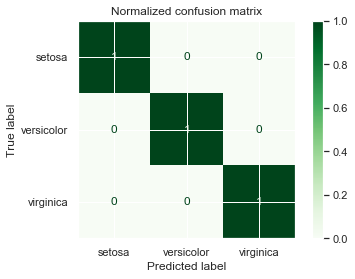

In [126]:
class_names = iris.target_names
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model_svm, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)
plt.show()

#### Naive Bayes Classification

In [127]:
from sklearn.naive_bayes import GaussianNB 

Checking on model's accuracy:

In [153]:
model_nbc = GaussianNB()
model_nbc.fit(x_train, y_train) 
prediction = model_nbc.predict(x_test) 
print('The accuracy of the naive bayes classification is: %0.2f' 
      % accuracy_score(prediction, y_test), 'on testing set.')
print('The accuracy of the naive bayes classification is:', model_nbc.score(x_train, y_train), 
      'on training set.\n') 

print(classification_report(prediction, y_test))

The accuracy of the naive bayes classification is: 0.97 on testing set.
The accuracy of the naive bayes classification is: 0.9583333333333334 on training set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      1.00      0.94         8
           2       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



As we can see, the accuracy of the naive bayes classification is **97%** on test set and **96%** on training set.

Checking on confusion matrix:

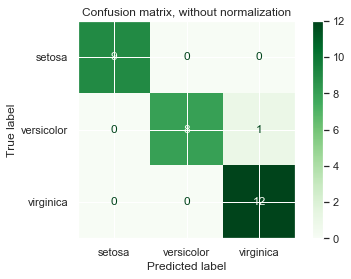

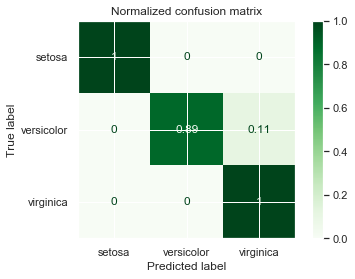

In [129]:
class_names = iris.target_names
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model_nbc, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)
plt.show()

#### Random forest

In [130]:
from sklearn.ensemble import RandomForestClassifier

Checking on model's accuracy:

In [155]:
model_rf = RandomForestClassifier(n_estimators=120, oob_score=True, n_jobs=-1, 
                              max_features=None, min_samples_leaf=10)
model_rf.fit(x_train, y_train)
prediction = model_rf.predict(x_test)
print('The accuracy of the random forest is: %0.2f' 
      % accuracy_score(prediction, y_test), 'on testing set.')
print('The accuracy of the random forest is:', model_rf.score(x_train, y_train), 
      'on training set.\n') 
 
print(classification_report(prediction, y_test))

The accuracy of the random forest is: 0.90 on testing set.
The accuracy of the random forest is: 0.9833333333333333 on training set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      0.80      0.84        10
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



As we can see, the accuracy of the random forest is **90%** on test set and **98%** on training set.

Checking on confusion matrix:

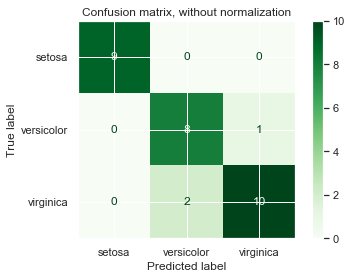

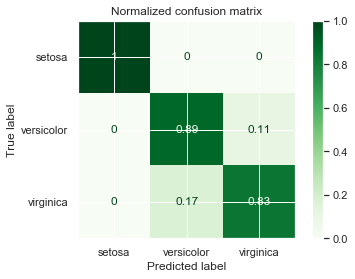

In [132]:
class_names = iris.target_names
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model_rf, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)
plt.show()

Now we will compare the accuracy on training and testing set of each algorithm.

In [159]:
 acc_table = {
 'Algorithm': ['Logistic regression', 'Stochastic Gradient Descent', 'Decision tree', 
               'K-Nearest Neighbors', 'Support Vector Machines', 
               'Naive Bayes Classification', 'Random forest'],
 'Accuracy testing set': ['97%', '97%', '90%', '100%', '100%', '97%', '90%'],
 'Accuracy training set': ['98%', '97%', '97%', '100%', '98%', '96%', '98%']
 }
table = pd.DataFrame(acc_table, columns=['Algorithm', 'Accuracy testing set', 
                                        'Accuracy training set'])
table

,Algorithm,Accuracy testing set,Accuracy training set
0,Logistic regression,97%,98%
1,Stochastic Gradient Descent,97%,97%
2,Decision tree,90%,97%
3,K-Nearest Neighbors,100%,100%
4,Support Vector Machines,100%,98%
5,Naive Bayes Classification,97%,96%
6,Random forest,90%,98%


As we can see, all algorithms show pretty good accuracy scores. The best ones are Logistic regression, K-Nearest Neighbors and Support Vector Machines. 

#### **Choosing the best algorithm for the classification problem:** 

At this point, the best accuracy has KNN model, which is 100%. Thus, we will proceed with this model for k = 1.

I used KNN model to fit the model for the entire dataset instead of just the training set. 

I also allowed the user to insert own values of sepal and petal lenght and width in order to predict the class of the iris flower. 

In [181]:
x = iris.data
y = iris.target

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x, y)

sepal_l = input("Insert sepal lenght: ")

Insert sepal lenght: 5


In [182]:
sepal_w = input("Insert sepal width: ")

Insert sepal width: 3


In [183]:
petal_l = input("Insert petal lenght: ")

Insert petal lenght: 1


In [184]:
petal_w = input("Insert petal width: ")

Insert petal width: 0.3


In [185]:
iris_class = knn.predict([[sepal_l, sepal_w, petal_l, petal_w]])

def prediction(iris_class):
    if iris_class == 0:
        print('Predicted class: iris setosa.')
    elif iris_class == 1:
        print('Predicted class: iris versicolor.')
    else:
        print('Predicted class: iris virginica.')

prediction(iris_class)

Predicted class: iris setosa.


As we can see, from the values inserted above, and with the use of KNN model, we are able to predict the class of the iris flower. 